In [220]:
# Import necessary packages
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import deepcopy as cp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)

sns.set_style("ticks")
sns.set_context("paper")

random_state = 42

In [391]:
wines = pd.read_csv("data/winequalityN.csv")

In [182]:
wines.isnull().sum().sort_values

<bound method Series.sort_values of type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64>

In [183]:
wines.dropna(axis=0,inplace=True)

In [378]:
vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol'
]


- **fixed acidity:** a maioria dos ácidos envolvidos com vinho (não evaporam prontamente)
- **volatile acidity:** a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre
- **volatile acidity:** a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre
- **citric acid:** encontrado em pequenas quantidades, o ácido cítrico pode adicionar "leveza" e sabor aos vinhos
- **residual sugar:** a quantidade de açúcar restante após a fermentação é interrompida, é raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro são considerados doces
- **chlorides:** a quantidade de sal no vinho free sulfur dioxide: a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como gás dissolvido) e o íon bissulfito; impede o crescimento microbiano e a oxidação do vinho
- **total sulfur dioxide:** Quantidade de formas livres e encadernadas de S02; em baixas concentrações, o SO2 é quase indetectável no vinho, mas nas concentrações de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho.
- **density:** a densidade do vinho é próxima a da água, dependendo do percentual de álcool e teor de açúcar
- **pH:** descreve se o vinho é ácido ou básico numa escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4 na escala de pH
- **sulphates:** um aditivo de vinho que pode contribuir para os níveis de gás de dióxido de enxofre (S02), que age como um antimicrobiano e antioxidante
- **alcohol:** o percentual de álcool no vinho

______________________________

White Wines

In [185]:
white_wines = wines[wines['type'] == "white"].copy()

In [165]:
#white_wines.dropna(axis=0,inplace=True)

In [186]:
white_wines.reset_index(inplace=True)

Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5

In [203]:
white_wines["opinion"] = (white_wines.quality > 5).astype(int)
white_wines["opinion"]

0       1
1       1
2       1
3       1
4       1
       ..
4865    1
4866    1
4867    0
4868    1
4869    1
Name: opinion, Length: 4870, dtype: int32

In [189]:
white_wines.isnull().sum().sort_values

<bound method Series.sort_values of index                   0
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
opinion                 0
dtype: int64>

Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)?

In [190]:
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4870 non-null   int64  
 1   type                  4870 non-null   object 
 2   fixed acidity         4870 non-null   float64
 3   volatile acidity      4870 non-null   float64
 4   citric acid           4870 non-null   float64
 5   residual sugar        4870 non-null   float64
 6   chlorides             4870 non-null   float64
 7   free sulfur dioxide   4870 non-null   float64
 8   total sulfur dioxide  4870 non-null   float64
 9   density               4870 non-null   float64
 10  pH                    4870 non-null   float64
 11  sulphates             4870 non-null   float64
 12  alcohol               4870 non-null   float64
 13  quality               4870 non-null   int64  
 14  opinion               4870 non-null   float64
dtypes: float64(12), int64

In [191]:
white_wines.head()

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1.0
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.0
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1.0
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0


In [158]:
white_wines.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'opinion'],
      dtype='object')

# Questão 3

Quais são os tipos de variáveis

In [375]:
types = [
        ("Type", "Categórica"),
        ("Fixed_Acidity", "Discreta"),
        ("Fixed_Acidity", "Discreta"),
        ("Volatile_Acidity", "Contínua"),
        ("Citric_Acid", "Contínua"),
        ("Residual_Sugar", "Contínua"),
        ("Chlorides", "Contínua"),
        ("Free_Sulfur_Dioxide", "Discreta"),
        ("Total_Sulfur_Dioxide", "Discreta"),
        ("Density", "Contínua"),
        ("pH", "Contínua"),
        ("Sulphates", "Contínua"),
        ("Alcohol", "Contínua"),
        ("Quality", "Discreta"),
        ("Opinion", "Categórica")
]

In [376]:
df = pd.DataFrame(types,columns=["Variável","Tipo"])
df = df.set_index(["Variável"])


In [377]:
df

,Tipo
Variável,
Type,Categórica
Fixed_Acidity,Discreta
Fixed_Acidity,Discreta
Volatile_Acidity,Contínua
Citric_Acid,Contínua
Residual_Sugar,Contínua
Chlorides,Contínua
Free_Sulfur_Dioxide,Discreta
Total_Sulfur_Dioxide,Discreta


Quais são as médias e desvios padrões

In [192]:
white_wines.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,2457.259138,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029,0.665298
std,1409.940147,0.843444,0.100528,0.120915,5.070853,0.021846,17.012967,42.490515,0.002993,0.150902,0.114196,1.231251,0.885699,0.471935
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,1241.250000,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000,0.000000
50%,2458.500000,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993735,3.180000,0.470000,10.400000,6.000000,1.000000
75%,3677.750000,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,4897.000000,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


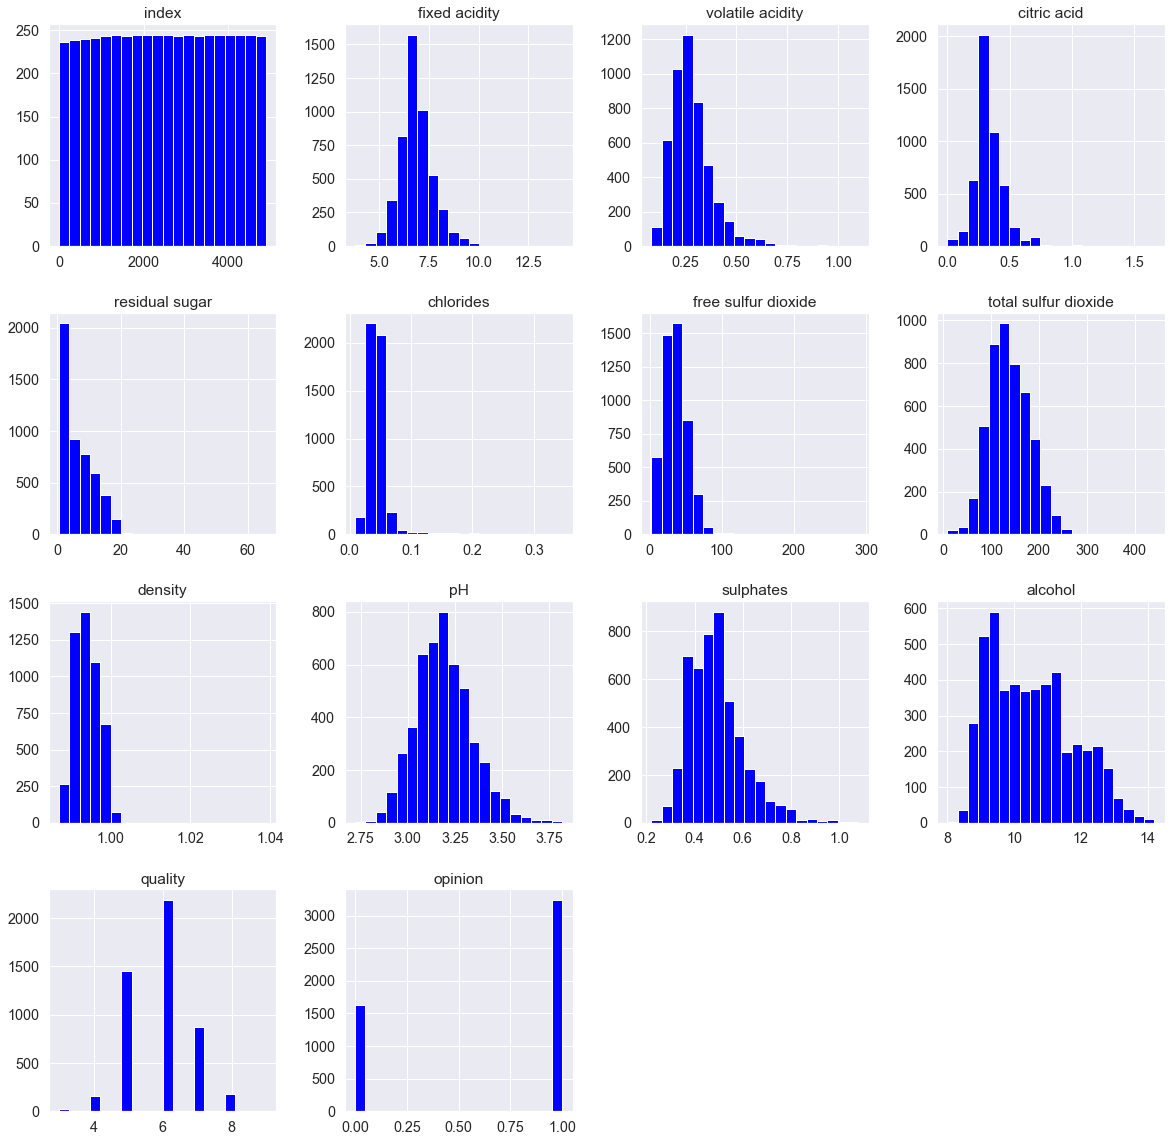

In [193]:
sns.set(font_scale=1.3,rc={"figure.figsize":(20,20)})
eixo = white_wines.hist(bins=20, color="blue")

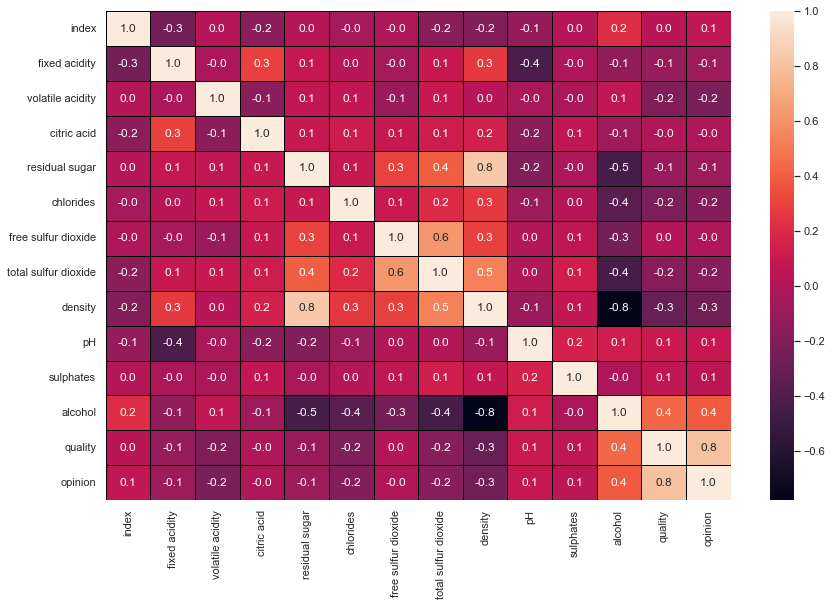

In [194]:
correlation = white_wines.corr()
correlation
sns.set(rc = {'figure.figsize':(14,9)})
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=1, linecolor='black')
plot;

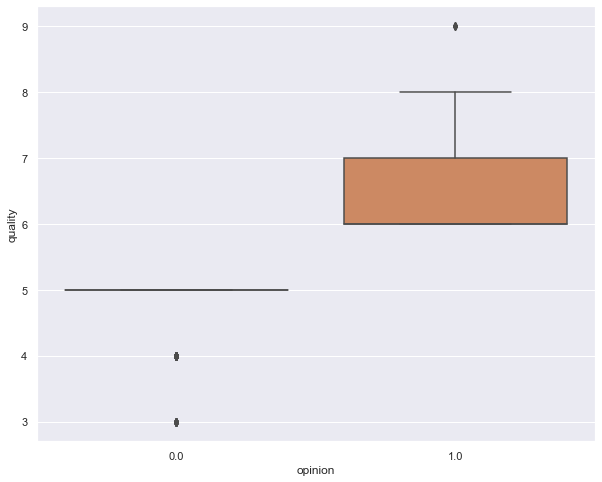

In [195]:
plt.figure(figsize=(10,8))
sns.boxplot(data=white_wines,x="opinion",y="quality");

In [212]:
X = white_wines[vars]
y = white_wines['opinion']

Questão 4.a

In [197]:
# Vamos dividir a base entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.2, # 20 % da base
                                                    random_state=171,
                                                    stratify=y)

# Vamos criar a escala

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vamos treinar!

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Vamos avaliar!!!

y_prob = model.predict_proba(X_train_scaled)
y_pred = model.predict(X_train_scaled)

y_pred_test = model.predict(X_test_scaled)

print(f"Meu resultado de F1-Score é {f1_score(y_train, y_pred):.2}")
print(f"Meu resultado para teste de F1-Score é {f1_score(y_test, y_pred_test):.2}")

Meu resultado de F1-Score é 0.82
Meu resultado para teste de F1-Score é 0.84


Treinando com K-Folds

In [217]:
cv = StratifiedKFold(n_splits=10)


f1_score_test_list = []
model_list =[]
accuracy_list = []
precision_list = []
recall_list = []
 
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    X_train = X.loc[train_idx, :].values
    y_train = y[train_idx]
    X_test = X.loc[test_idx, :].values
    y_test = y[test_idx]

    # Escala
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Treino
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    y_prob = model.predict_proba(X_train_scaled)
    y_pred = model.predict(X_train_scaled)

    y_pred_test = model.predict(X_test_scaled)
    print(f"========================= FOLD {fold} ==========================")
    print(f"Meu resultado de F1-Score é {f1_score(y_train, y_pred):.2}")
    print(f"Meu resultado para teste de F1-Score é {f1_score(y_test, y_pred_test):.2}") 
    f1_score_test_list.append(f1_score(y_test, y_pred_test))
    model_list.append(model)
    accuracy_list.append(accuracy_score(y_test, y_pred_test))
    precision_list.append(precision_score(y_test, y_pred_test))
    recall_list.append(recall_score(y_test, y_pred_test))
print()
print()
print("========================= Questão 4.b ==========================")
print(f"Meu resultado de F1-Score Médio é {np.mean(f1_score_test_list): .2} +- {np.std(f1_score_test_list): .2} ")
print(f"Meu resultado de Acurárica Médio é {np.mean(accuracy_list): .2} +- {np.std(accuracy_list): .2} ")
print(f"Meu resultado de Precisão Média é {np.mean(precision_list): .2} +- {np.std(precision_list): .2} ")
print(f"Meu resultado de Sensibilidade/Recall Médio é {np.mean(recall_list): .2} +- {np.std(recall_list): .2} ")
best_model = model_list[np.argmax(f1_score_test_list)]

========================= FOLD 0 ==========================
Meu resultado de F1-Score é 0.84
Meu resultado para teste de F1-Score é 0.74
========================= FOLD 1 ==========================
Meu resultado de F1-Score é 0.82
Meu resultado para teste de F1-Score é 0.83
========================= FOLD 2 ==========================
Meu resultado de F1-Score é 0.83
Meu resultado para teste de F1-Score é 0.83
========================= FOLD 3 ==========================
Meu resultado de F1-Score é 0.82
Meu resultado para teste de F1-Score é 0.81
========================= FOLD 4 ==========================
Meu resultado de F1-Score é 0.83
Meu resultado para teste de F1-Score é 0.79
========================= FOLD 5 ==========================
Meu resultado de F1-Score é 0.82
Meu resultado para teste de F1-Score é 0.87
========================= FOLD 6 ==========================
Meu resultado de F1-Score é 0.83
Meu resultado para teste de F1-Score é 0.82
========================= FOLD 7 ========

In [218]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.34      0.45       163
           1       0.73      0.91      0.81       324

    accuracy                           0.72       487
   macro avg       0.70      0.63      0.63       487
weighted avg       0.71      0.72      0.69       487



______________________________________

# Curva Roc - Código

In [229]:
def logit_train(X, y, test_size : float = 0.2, random_state=42, stratify=None, **logit_kwargs):
    """
    Method for training a model using logit regression.
    """
    random.seed(random_state) # "GLOBAL"/ LOCAL
    np.random.seed(random_state)

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=test_size,
                                                        random_state=random_state, # LOCAL
                                                        stratify=stratify)
    scaler = StandardScaler() # LOCAL
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression(**logit_kwargs, random_state=random_state)
    model.fit(X_train_scaled, y_train)

    return {
        'model': model,
        'scaler': scaler,
        'X_train': X_train,
        'X_train_scaled': X_train_scaled,
        'X_test': X_test,
        'X_test_scaled': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test
    }

class LogitTrainResults:
    def __init__(self, results):
        self.model = results['model']
        self.scaler = results['scaler']
        self.X_train = results['X_train']
        self.X_train_scaled = results['X_train_scaled']
        self.X_test = results['X_test']
        self.X_test_scaled = results['X_test_scaled']
        self.y_train = results['y_train']
        self.y_test = results['y_test']

    def accuracy_train(self):
        y_pred = self.model.predict(self.X_train_scaled)
        return accuracy_score(self.y_train, y_pred)

    def accuracy_test(self):
        y_pred = self.model.predict(self.X_test_scaled)
        return accuracy_score(self.y_test, y_pred)

    def plot_roc(self, X, y, estimator_name : str = "treino", **kwargs):
        y_hat = self.model.predict_proba(X)
        fpr, tpr, thresholds = roc_curve(y, y_hat[:, 1], pos_label=1)
        auc_score = auc(fpr, tpr)

        return RocCurveDisplay(fpr=fpr,
                               tpr=tpr,
                               roc_auc=auc_score,
                               estimator_name = estimator_name).plot(**kwargs)

    def plot_roc_train(self, **kwargs):
        self.plot_roc(self.X_train_scaled, self.y_train, estimator_name="treino", **kwargs)

    def plot_roc_test(self, **kwargs):
        self.plot_roc(self.X_test_scaled, self.y_test, estimator_name="teste", **kwargs)

In [237]:
config = {
    "test_size" : 0.3,
    "bad_wine_upper_bound" : 6
}

In [239]:
test_size = config["test_size"]
bad_wine_upper_bound = config["bad_wine_upper_bound"]

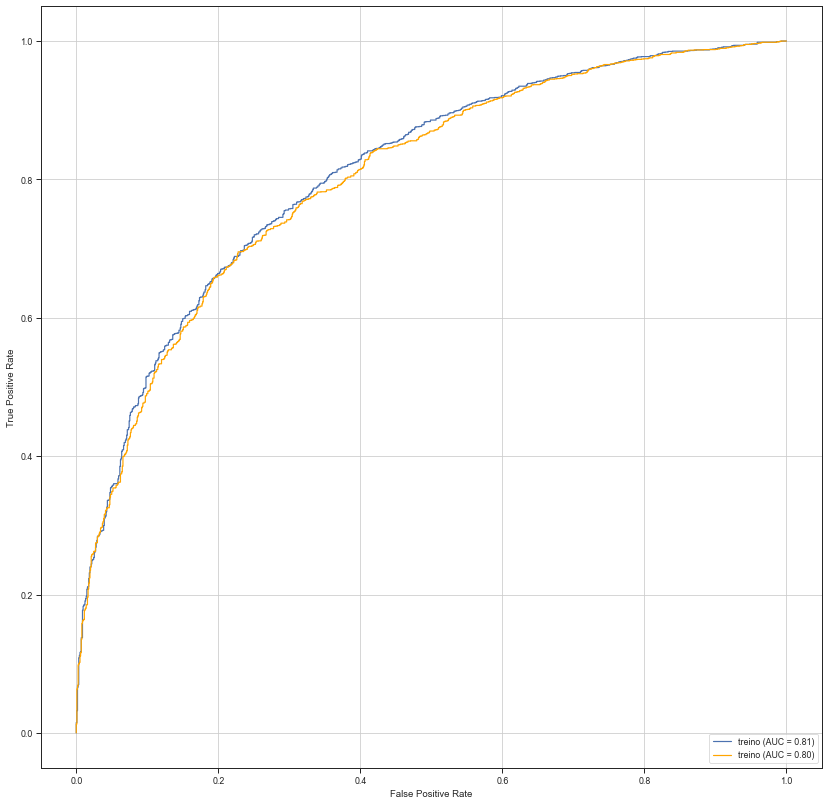

In [246]:
X = white_wines[vars]
y = white_wines['opinion']
stratify = y

result_1 = LogitTrainResults(logit_train(X, y, test_size, stratify=stratify, random_state=42, max_iter=100000))
result_2 = LogitTrainResults(logit_train(X, y, test_size, stratify=stratify, random_state=171, max_iter=100000))


fig, ax = plt.subplots(1, 1, figsize=(14,14))
result_1.plot_roc_train(ax=ax)
result_2.plot_roc_train(ax=ax, color='orange')
ax.grid()

In [252]:
X = white_wines[vars]
y = white_wines['opinion']
stratify = y
random_state = 42
test_size = 0.1

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X.values,
                                                          y.values,
                                                          test_size=test_size,
                                                          random_state=random_state,
                                                          stratify=stratify)

In [256]:
def interpolation(fpr, tpr):
    interp_fpr = np.linspace(0, 1, 100)
    interp_tpr = np.interp(interp_fpr, fpr, tpr)
    interp_tpr[0] = 0.
    return interp_fpr, interp_tpr

def train_cv(model, cv):
    fig, ax = plt.subplots(1, 1, figsize=(14, 14))
    fprs_list = []
    tprs_list = []
    auc_list  = []
    scaler_list = []
    for fold, (train, val) in enumerate(cv.split(X_train_cv, y_train_cv)):
        X_train = X_train_cv[train, :]
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        scaler_list.append(scaler)
        y_train = y_train_cv[train]
        X_val = X_train_cv[val, :]
        X_val_scaled = scaler.transform(X_val)
        y_val = y_train_cv[val]

        model.fit(X_train_scaled, y_train)

        viz = RocCurveDisplay.from_estimator(
            model,
            X_val_scaled,
            y_val,
            ax = ax,
            alpha=0.3,
            lw=1
        )
        interp_fpr, interp_tpr = interpolation(viz.fpr, viz.tpr)
        fprs_list.append(interp_fpr)
        tprs_list.append(interp_tpr)
        auc_list.append(viz.roc_auc) 

    mean_fpr = np.mean(fprs_list, axis=0)
    mean_tpr = np.mean(tprs_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    ax.plot(
        mean_fpr,
        mean_tpr,
        color='blue',
        lw=2,
        label=r"Mean ROC (AUC = %.2f $\pm$ %.2f)" %(mean_auc, std_auc)
    )


    ax.plot(np.linspace(0, 1, 100),
            np.linspace(0, 1, 100),
            color='g',
            ls=":",
            lw=0.5)
    ax.legend()

Curva ROC Regressão Logística

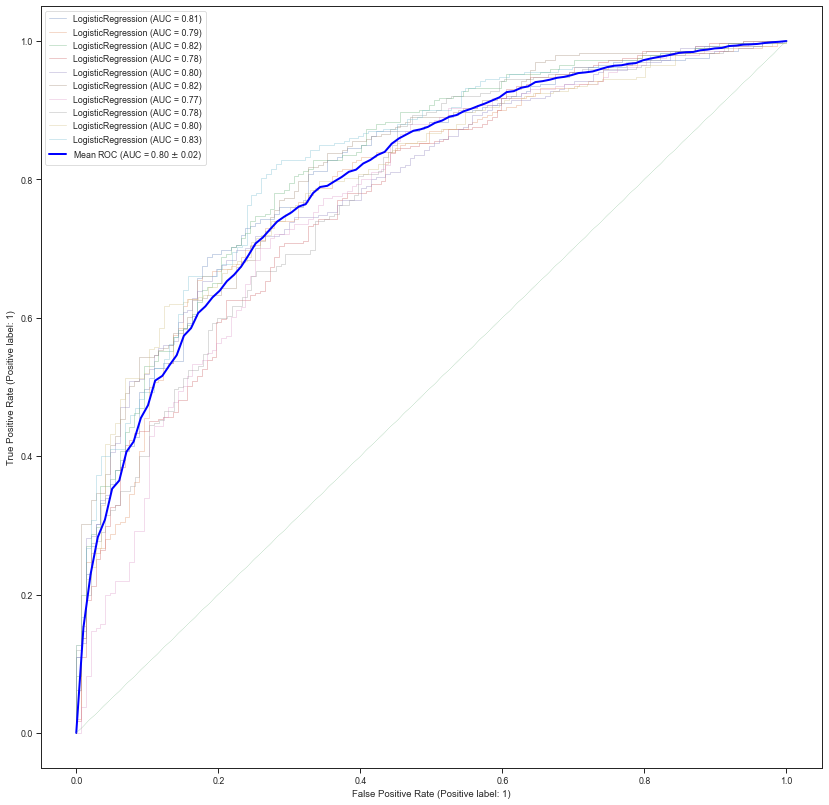

In [257]:

cv = StratifiedKFold(n_splits=10)
model_1 = LogisticRegression(max_iter=10000, random_state=random_state)
train_cv(model_1, cv)

______________________________________________________

# Árvore de Decisão - Questão 4.c 

In [302]:
from sklearn.tree import (
    DecisionTreeClassifier, 
    plot_tree
)

In [303]:
StratifiedKFold(n_splits=10)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [348]:
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X.values,
                                                          y.values,
                                                          test_size=0.2, # 20 % da base
                                                          random_state=42,
                                                          stratify=y)

def train(X, y, model_klass, model_kwargs = {}):
    cv = StratifiedKFold(n_splits=10)
    
    f1_score_val_list = []
    f1_score_train_list = []
    model_list =[]
    scaler_list = []
    model_list =[]
    accuracy_list = []
    precision_list = []
    recall_list = []
    
    # Validação cruzada só em Training Data
    # Validação cruzada só em Training Data
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val = X[val_idx, :]
        y_val = y[val_idx]

        # Escala
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        scaler_list.append(scaler)

        # Treino
        model = model_klass(**model_kwargs)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_train_scaled)

        y_pred_val = model.predict(X_val_scaled)
        print(f"========================= FOLD {fold} ==========================")
        print(f"Meu resultado para treino de F1-Score é {f1_score(y_train, y_pred):.2}")
        print(f"Meu resultado para validação de F1-Score é {f1_score(y_val, y_pred_val):.2}")
        print(f"Meu resultado para validação de Recall é {recall_score(y_train, y_pred):.2}") 
        print(f"Meu resultado para validação de Acurácia é {accuracy_score(y_train, y_pred):.2}")
        print(f"Meu resultado para validação de Precisão é {precision_score(y_train, y_pred):.2}")
        
        f1_score_val_list.append(f1_score(y_val, y_pred_val))
        f1_score_train_list.append(f1_score(y_train, y_pred))
        accuracy_list.append(accuracy_score(y_train, y_pred))
        precision_list.append(precision_score(y_train, y_pred))
        recall_list.append(recall_score(y_train, y_pred))
        model_list.append(model)

    print()
    print("-------------------------------------------------------------------------------------")
    print()
    print(f"Meu resultado de F1-Score Médio de treino é {np.mean(f1_score_train_list): .2} +- {np.std(f1_score_train_list): .2} ")
    print(f"Meu resultado de F1-Score Médio de validação é {np.mean(f1_score_val_list): .2} +- {np.std(f1_score_val_list): .2} ")
    print(f"Meu resultado de Recall Médio é {np.mean(recall_list): .2} +- {np.std(recall_list): .2} ")
    print(f"Meu resultado de Acurárica Médio é {np.mean(accuracy_list): .2} +- {np.std(accuracy_list): .2} ")
    print(f"Meu resultado de Precisão Média é {np.mean(precision_list): .2} +- {np.std(precision_list): .2} ")

    print()

    best_model_idx = np.argmax(f1_score_val_list)
    print(f"Meu melhor fold é: {best_model_idx} ")
    best_model = model_list[best_model_idx]

    # Fazer a inferência em Test Data
    best_scaler = scaler_list[best_model_idx]
    X_test_scaled = best_scaler.transform(X_test)
    y_pred_test = model.predict(X_test_scaled)

    print()
    print(f"Meu resultado de F1-Score para o conjunto de teste é: {f1_score(y_test, y_pred_test):.2} ")
    return best_model

In [358]:
tree_model = train(X_train_cv, y_train_cv, DecisionTreeClassifier, model_kwargs={'min_samples_leaf': 50})

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.85
Meu resultado para validação de F1-Score é 0.81
Meu resultado para validação de Recall é 0.87
Meu resultado para validação de Acurácia é 0.8
Meu resultado para validação de Precisão é 0.83
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.84
Meu resultado para validação de F1-Score é 0.83
Meu resultado para validação de Recall é 0.84
Meu resultado para validação de Acurácia é 0.79
Meu resultado para validação de Precisão é 0.84
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.85
Meu resultado para validação de F1-Score é 0.83
Meu resultado para validação de Recall é 0.87
Meu resultado para validação de Acurácia é 0.79
Meu resultado para validação de Precisão é 0.83
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.84
Meu resulta

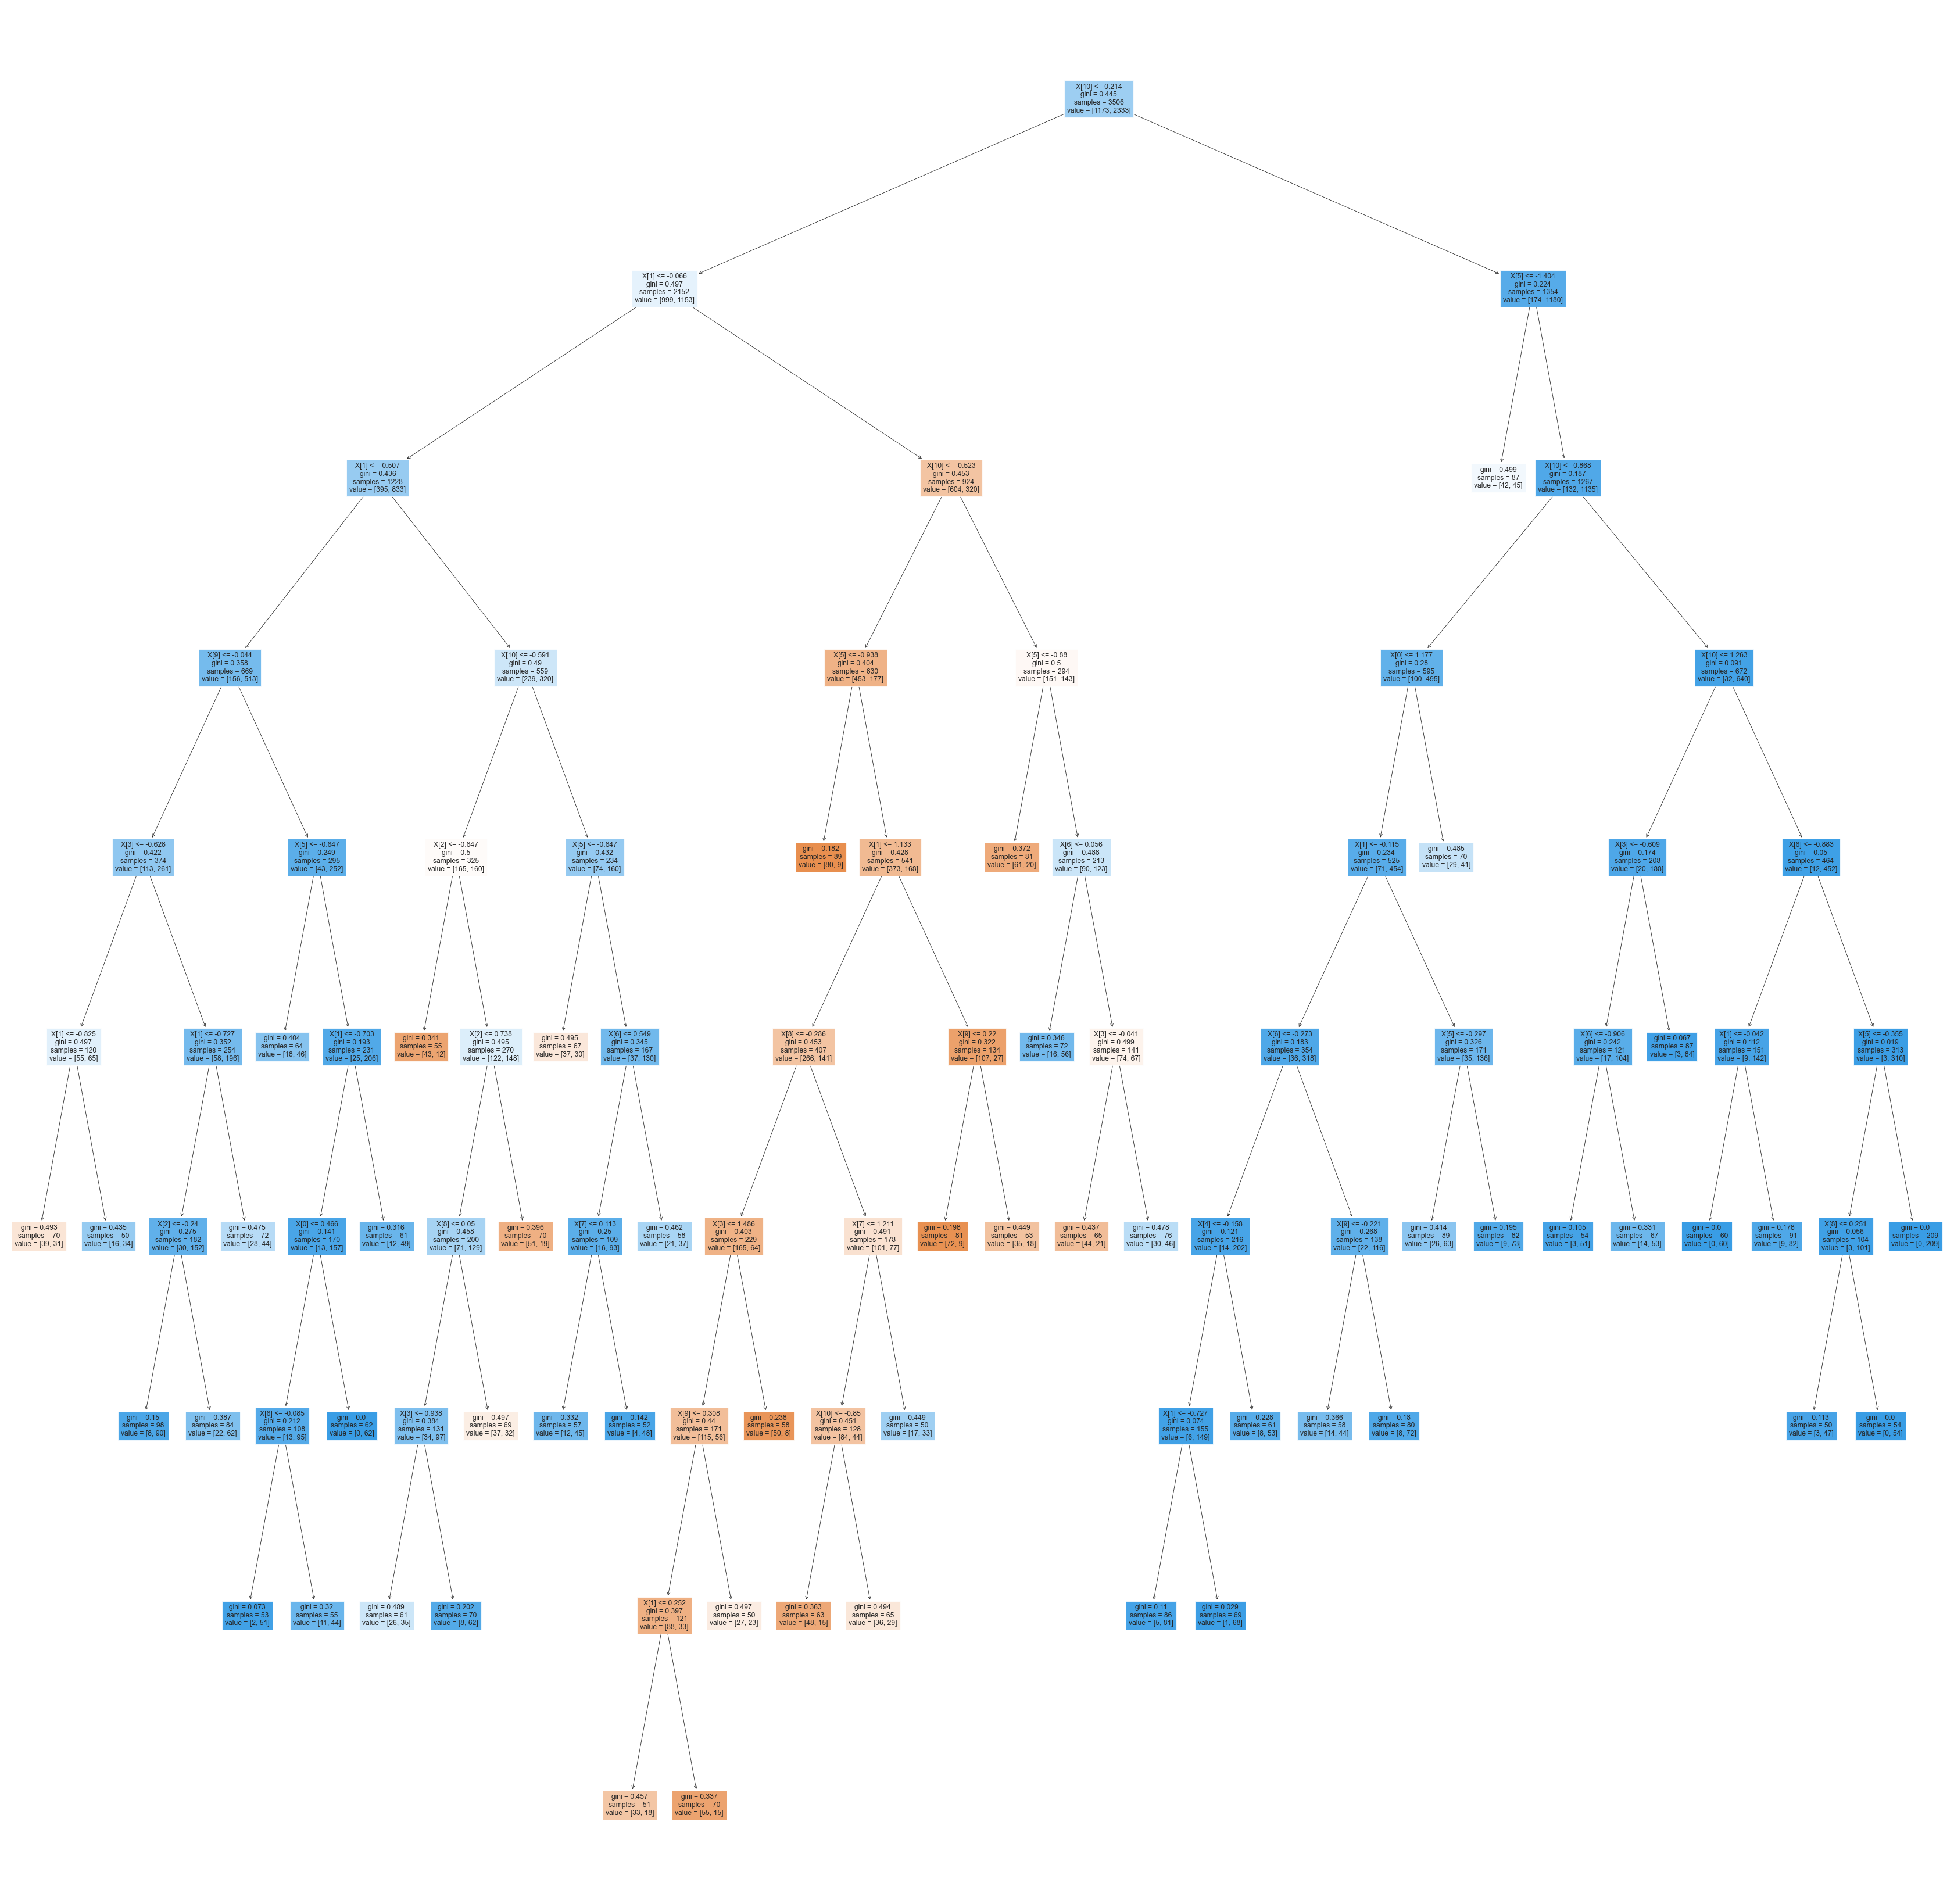

In [359]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(60, 60))
plot_tree(tree_model, filled=True);

Curva ROC Árvore de Decisão

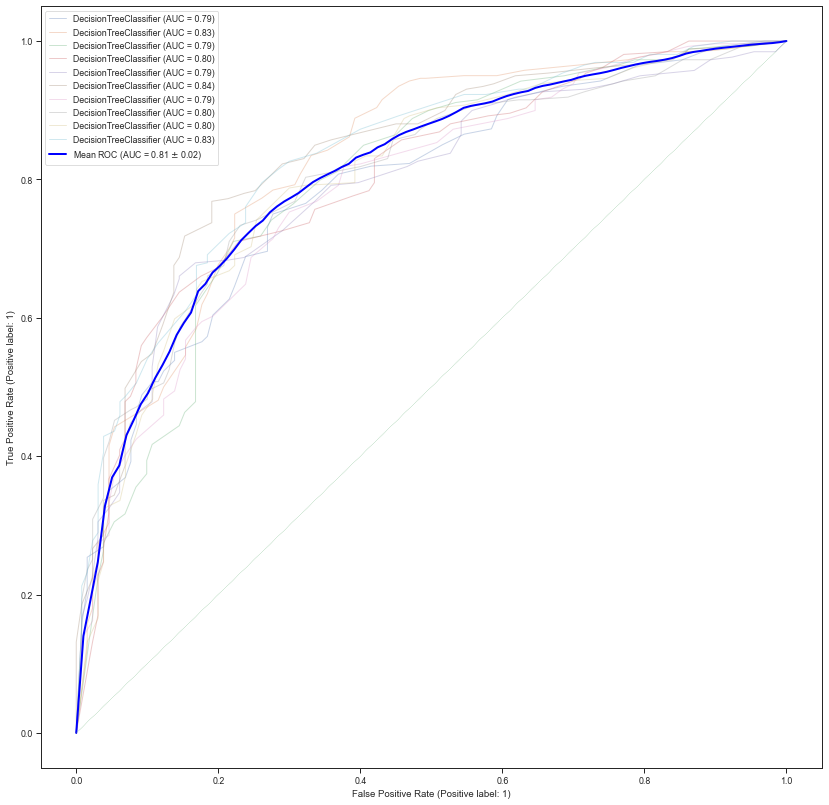

In [360]:
train_cv(tree_model, cv)

__________________________________

# SVM - Questão 4.d

In [357]:
from sklearn.svm import SVC
SVM = train(X_train_cv, y_train_cv, SVC, model_kwargs={'gamma': 2, 'C': 1, 'kernel': 'rbf'})

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.99
Meu resultado para validação de F1-Score é 0.85
Meu resultado para validação de Recall é 1.0
Meu resultado para validação de Acurácia é 0.99
Meu resultado para validação de Precisão é 0.99
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.99
Meu resultado para validação de F1-Score é 0.86
Meu resultado para validação de Recall é 1.0
Meu resultado para validação de Acurácia é 0.99
Meu resultado para validação de Precisão é 0.99
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.99
Meu resultado para validação de F1-Score é 0.85
Meu resultado para validação de Recall é 1.0
Meu resultado para validação de Acurácia é 0.99
Meu resultado para validação de Precisão é 0.99
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.99
Meu resultado

Curva ROC SVM

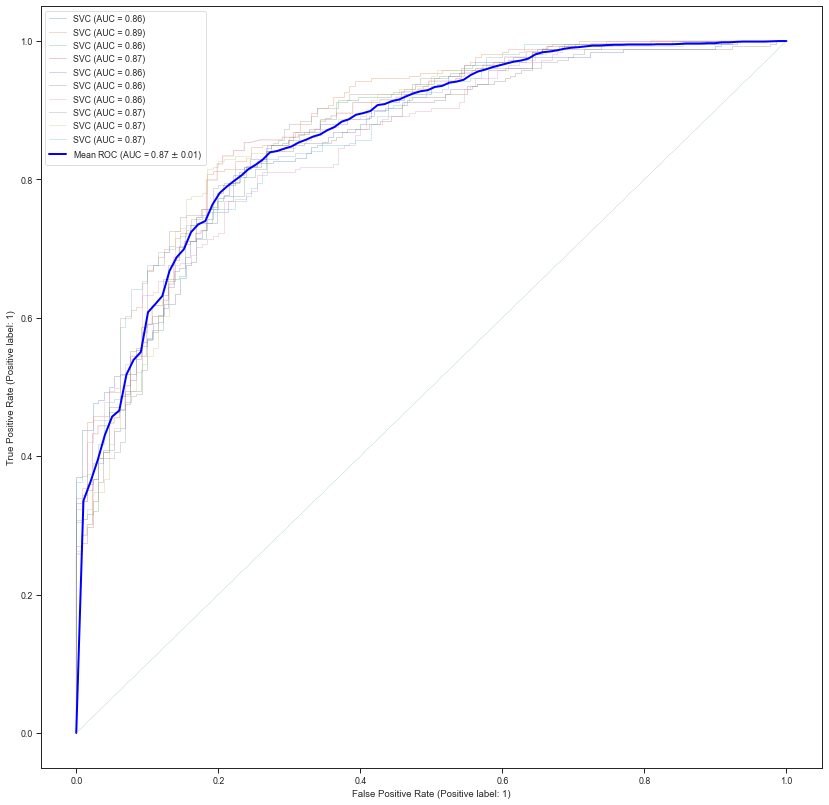

In [361]:
train_cv(SVM, cv)

# Curva Roc - Questão 5

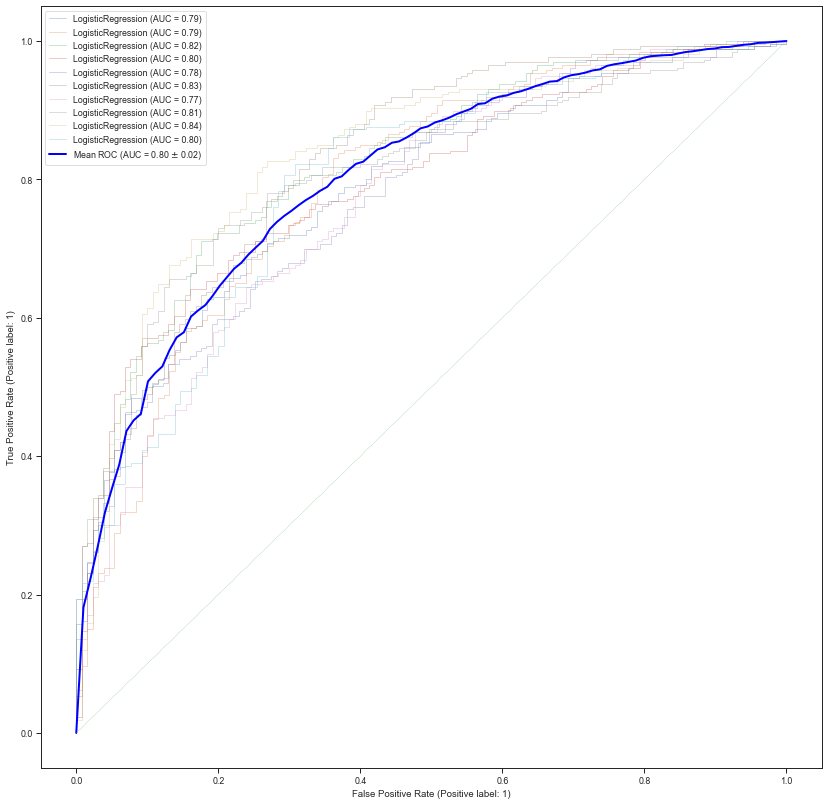

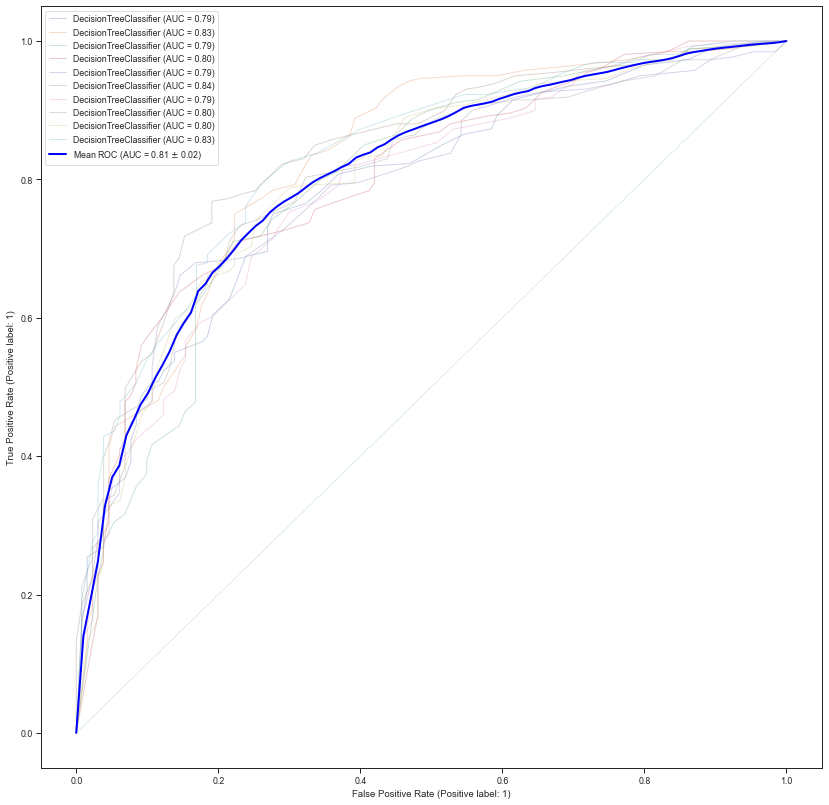

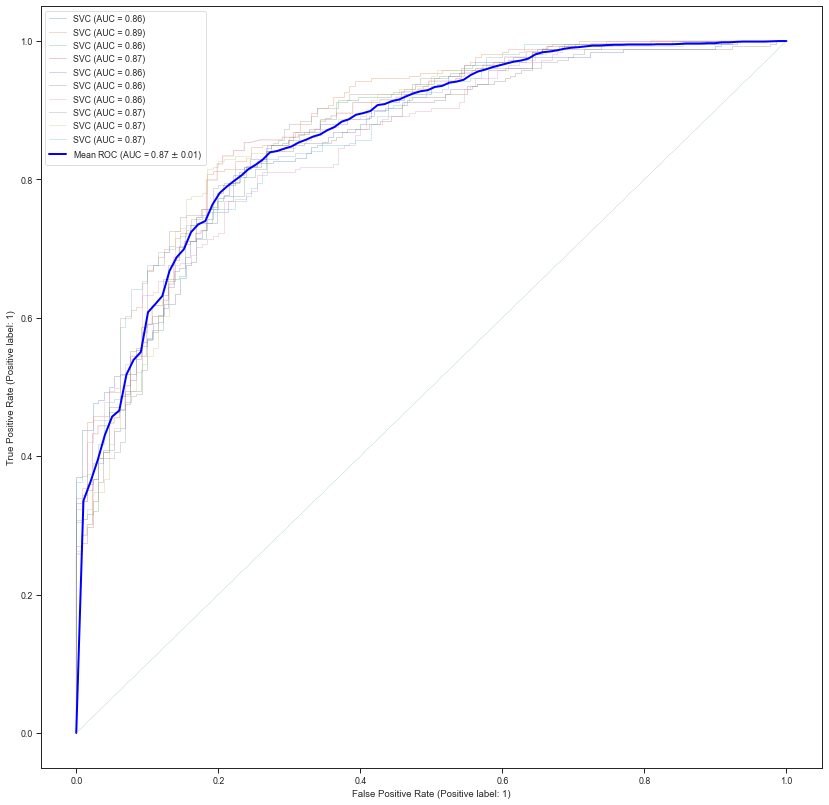

In [363]:
train_cv(model_1, cv), train_cv(tree_model, cv), train_cv(SVM, cv);

A melhor curva ROC foi a do **SVM**, com média de **AUC 0.87**

_________________________________________________

# Questão 6 - Red Wines

In [364]:
red_wines = wines[wines['type'] == "red"].copy()

In [367]:
red_wines.dropna(axis=0,inplace=True)

In [381]:
red_wines.reset_index()

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
1,4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.0
2,4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.0
3,4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1.0
1589,6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.0
1590,6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1591,6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.0


In [368]:
red_wines.isnull().sum().sort_values

<bound method Series.sort_values of type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64>

Criando uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5

In [369]:
number_of_wines = red_wines.shape[0]
red_wines['opinion'] =  np.zeros((number_of_wines, 1))
red_wines.loc[red_wines.quality > 5, "opinion"] = 1

In [382]:
red_wines.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'opinion'],
      dtype='object')

In [384]:
X_red = red_wines[vars]
y_red = red_wines['opinion']

In [387]:
X_red_train_cv, X_red_test, y_red_train_cv, y_red_test = train_test_split(X_red.values,
                                                          y_red.values,
                                                          test_size=0.2, # 20 % da base
                                                          random_state=42,
                                                          stratify=y_red)

In [389]:
from sklearn.svm import SVC
SVM_red = train(X_red_train_cv, y_red_train_cv, SVC, model_kwargs={'gamma': 2, 'C': 1, 'kernel': 'rbf'})

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.8
Meu resultado para validação de Recall é 1.0
Meu resultado para validação de Acurácia é 1.0
Meu resultado para validação de Precisão é 1.0
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.99
Meu resultado para validação de F1-Score é 0.78
Meu resultado para validação de Recall é 1.0
Meu resultado para validação de Acurácia é 0.99
Meu resultado para validação de Precisão é 0.99
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.99
Meu resultado para validação de F1-Score é 0.8
Meu resultado para validação de Recall é 1.0
Meu resultado para validação de Acurácia é 0.99
Meu resultado para validação de Precisão é 0.99
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para 

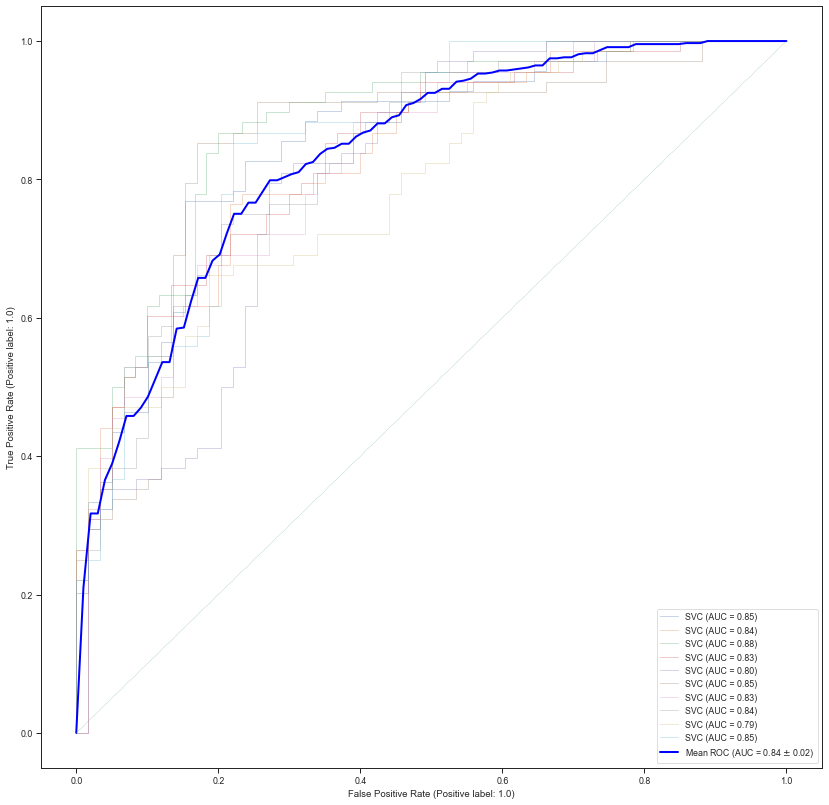

In [390]:
train_cv(SVM_red, cv)

### Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

Funciona da mesma forma, porém não gerou o mesmo resultado.

**1.  Resultados do Vinho Tinto:**

- Meu resultado de F1-Score Médio de treino é  1.0 +-  0.0012
- Meu resultado de F1-Score Médio de validação é  0.79 +-  0.02
- Meu resultado de Recall Médio é  1.0 +-  0.0015
- Meu resultado de Acurárica Médio é  0.99 +-  0.0013
- Meu resultado de Precisão Média é  0.99 +-  0.0018
- Curva Roc Média AUC 0.84.

**2. Resultados do Vinho Branco:**

- Meu resultado de F1-Score Médio de treino é  0.99 +-  0.00051 
- Meu resultado de F1-Score Médio de validação é  0.85 +-  0.0063 
- Meu resultado de Recall Médio é  1.0 +-  0.0011 
- Meu resultado de Acurárica Médio é  0.99 +-  0.00068 
- Meu resultado de Precisão Média é  0.99 +-  0.00067
- Curva Roc Média AUC 0.87.

_______________________________________________

# Questão 7

Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.